# Sección 2: Análisis exploratorio de datos

In [5]:
#Libraries
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from fbprophet import Prophet
import os

#global variables 
data_folder='C:/Users/ylove/Documents/Diego/examen_DS_bbva/examen_DS_bbva/data'

## 1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos?

Hay varios pasos a seguir, algunos pasos de preprocessing generales a seguir.

Exploración general de los datos, typos en datos, tipos de datos, 
Imputacion de datos nulos, revision de duplicados y outliers.

## Carga de datos y spot checks

Cargamos los datos a un dataframe.

In [6]:
df = pd.read_csv(data_folder+'/pgj/carpetas-de-investigacion-pgj-cdmx.csv')

Revisamos como se ven los datos

In [7]:
df.head(3)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"


Como primer check revisamos las delegaciones que se encuentran

In [8]:
df.alcaldia_hechos.unique()

array(['GUSTAVO A MADERO', 'TLALNEPANTLA DE BAZ', 'IZTACALCO',
       'IZTAPALAPA', 'BENITO JUAREZ', 'CUAUHTEMOC',
       'LA MAGDALENA CONTRERAS', 'AZCAPOTZALCO', 'MIGUEL HIDALGO',
       'VENUSTIANO CARRANZA', 'TEXCOCO', 'ALVARO OBREGON', 'MILPA ALTA',
       'TLALPAN', 'COYOACAN', 'XOCHIMILCO', 'CUAJIMALPA DE MORELOS',
       'TLAHUAC', 'SOLIDARIDAD', 'NEZAHUALCOYOTL', 'HUIXQUILUCAN',
       'BOCOYNA', 'IRAPUATO', nan, 'NAUCALPAN DE JUAREZ', 'TECAMAC',
       'CHALCO', 'CUAUTLA', 'CHIMALHUACAN', 'PUERTO VALLARTA',
       'JOSE MARIA MORELOS', 'LA PAZ', 'ECATEPEC DE MORELOS', 'METEPEC',
       'PACHUCA DE SOTO', 'CUERNAVACA', 'ALTAMIRA', 'LOS CABOS',
       'ACAPULCO DE JUAREZ', 'TULTITLAN', 'TEOTIHUACAN', 'SIN DATO',
       'TAMPICO', 'MERIDA', 'LIBRES', 'HUEHUETOCA', 'ZACAPOAXTLA',
       'PUEBLA', 'AMECA', 'ACOLMAN', 'GUANAJUATO', 'HUITZILAC',
       'COACALCO DE BERRIOZABAL', 'OCOYOACAC', 'TLAXCO',
       'ATIZAPAN DE ZARAGOZA', 'CHICOLOAPAN', 'SAN JOSE DEL RINCON',
       'JIUTE

Vemos que hay más alcaldías de las tipificadas en la ciudad de México filtramos solo aquellas que pertenecen a la CDMX

In [9]:
# lista de alcaldias
Alcaldias_CDMX =['ALVARO OBREGON',\
            'AZCAPOTZALCO',\
            'BENITO JUAREZ',\
            'COYOACAN',\
            'CUAJIMALPA DE MORELOS',\
            'CUAUHTEMOC',\
            'GUSTAVO A MADERO',\
            'IZTACALCO',\
            'IZTAPALAPA',\
            'LA MAGDALENA CONTRERAS',\
            'MIGUEL HIDALGO',\
            'MILPA ALTA',\
            'TLAHUAC',\
            'TLALPAN',\
            'VENUSTIANO CARRANZA',\
            'XOCHIMILCO',\

        ]

In [10]:
df_CDMX = df[df['alcaldia_hechos'].isin(Alcaldias_CDMX)]

Revismos si los tipos de datos están bien cargados en el dataframe

In [11]:
df_CDMX.dtypes

id                        int64
ao_hechos               float64
mes_hechos               object
fecha_hechos             object
delito                   object
categoria_delito         object
fiscalia                 object
agencia                  object
unidad_investigacion     object
colonia_hechos           object
alcaldia_hechos          object
fecha_inicio             object
mes_inicio               object
ao_inicio                 int64
calle_hechos             object
calle_hechos2            object
longitud                float64
latitud                 float64
geopoint                 object
dtype: object

Cambiamos la fecha al tipo de dato de fecha de pandas

In [8]:
df_CDMX.fecha_inicio = df_CDMX.fecha_inicio.astype('datetime64')
df_CDMX.fecha_hechos = df_CDMX.fecha_hechos.astype('datetime64')

C:\Users\ylove\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
#df_CDMX.set_index('fecha_hechos', inplace=True)

## 2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [10]:
print('Vemos que hay {} delitos en la base filtrada de la CDMX'.format(df_CDMX.categoria_delito.notnull().sum()))

Vemos que hay 800207 delitos en la base filtrada de la CDMX


In [11]:
print('Vemos el rango de inicio de {} a {} de los delitos en la base filtrada de la CDMX'.format(
    df_CDMX.fecha_hechos.min(),df_CDMX.fecha_hechos.max())
     )

Vemos el rango de inicio de 1906-06-02 19:00:00 a 2019-06-30 23:00:00 de los delitos en la base filtrada de la CDMX


## 3. ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

vemos los 5 delitos mas frecuentes por tipo de delito

In [12]:
df_CDMX['count']=1

C:\Users\ylove\AppData\Local\Temp/ipykernel_29680/1464035787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CDMX['count']=1


In [13]:
conteo_delitos_df=df_CDMX[['count','delito']].groupby([
    'delito']).sum().rename(columns = {
    'count': 'num_casos',}).sort_values(by=['num_casos'], ascending=False).reset_index()
display(conteo_delitos_df.head(5))

,delito,num_casos
0,VIOLENCIA FAMILIAR,69007
1,ROBO DE OBJETOS,51870
2,ROBO A NEGOCIO SIN VIOLENCIA,51396
3,FRAUDE,44826
4,DENUNCIA DE HECHOS,43613


Vemos el conteo de los delitos por alcaldia

In [14]:
delitod_por_alcaldia_df=df_CDMX[['count','alcaldia_hechos']].groupby([
    'alcaldia_hechos']).sum().rename(columns = {
    'count': 'num_casos',}).sort_values(by=['num_casos'], ascending=False).reset_index()
display(delitod_por_alcaldia_df)

,alcaldia_hechos,num_casos
0,CUAUHTEMOC,131397
1,IZTAPALAPA,119926
2,GUSTAVO A MADERO,80097
3,BENITO JUAREZ,70599
4,COYOACAN,54235
5,MIGUEL HIDALGO,53688
6,ALVARO OBREGON,52568
7,VENUSTIANO CARRANZA,46224
8,TLALPAN,46179
9,AZCAPOTZALCO,39435


In [15]:
delitos_por_alcaldia = df_CDMX[['delito', 'alcaldia_hechos']].pivot_table(
    index=['alcaldia_hechos'],
    columns=['delito'],
    values=['delito'],
    aggfunc=len
).fillna(0)[list(conteo_delitos_df.delito[:10])]
display(delitos_por_alcaldia)

delito,VIOLENCIA FAMILIAR,ROBO DE OBJETOS,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,DENUNCIA DE HECHOS,AMENAZAS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO
alcaldia_hechos,,,,,,,,,,
ALVARO OBREGON,5094.0,3091.0,3242.0,2595.0,2980.0,2464.0,1364.0,2139.0,1267.0,2139.0
AZCAPOTZALCO,3116.0,2639.0,3293.0,1691.0,1447.0,2288.0,1173.0,2416.0,1311.0,1760.0
BENITO JUAREZ,2832.0,4419.0,6076.0,6461.0,3309.0,2452.0,1224.0,2293.0,6030.0,2813.0
COYOACAN,4570.0,3870.0,3919.0,3002.0,3274.0,2583.0,1277.0,1594.0,2056.0,2475.0
CUAJIMALPA DE MORELOS,1195.0,791.0,903.0,770.0,435.0,455.0,122.0,85.0,150.0,367.0
CUAUHTEMOC,5640.0,10291.0,8095.0,11863.0,9216.0,5129.0,5432.0,4187.0,3981.0,2462.0
GUSTAVO A MADERO,7509.0,4278.0,5560.0,3070.0,4170.0,3548.0,3110.0,1987.0,2551.0,1781.0
IZTACALCO,4348.0,1919.0,1072.0,1322.0,1988.0,1633.0,1312.0,1738.0,1042.0,1164.0
IZTAPALAPA,13277.0,7115.0,8026.0,3524.0,6295.0,6069.0,6178.0,4720.0,1914.0,2390.0


## 4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

Agrupamos por incidencia diaria

In [16]:
delito_diario_alcaldia = df_CDMX[df_CDMX.fecha_hechos >= '2018-06-30'][['delito', 'fecha_hechos']].pivot_table(
    index=['fecha_hechos'],
    columns=['delito'],
    values=['delito'],
    aggfunc=len).fillna(0).resample('D', level=0).sum()

delito_diario_alcaldia = delito_diario_alcaldia[[col for col in conteo_delitos_df.delito if col in delito_diario_alcaldia.columns]]

De los 10 delitos con más incidencia vemos sus graficas diarias con una linea de tendencia promediada mensualmente

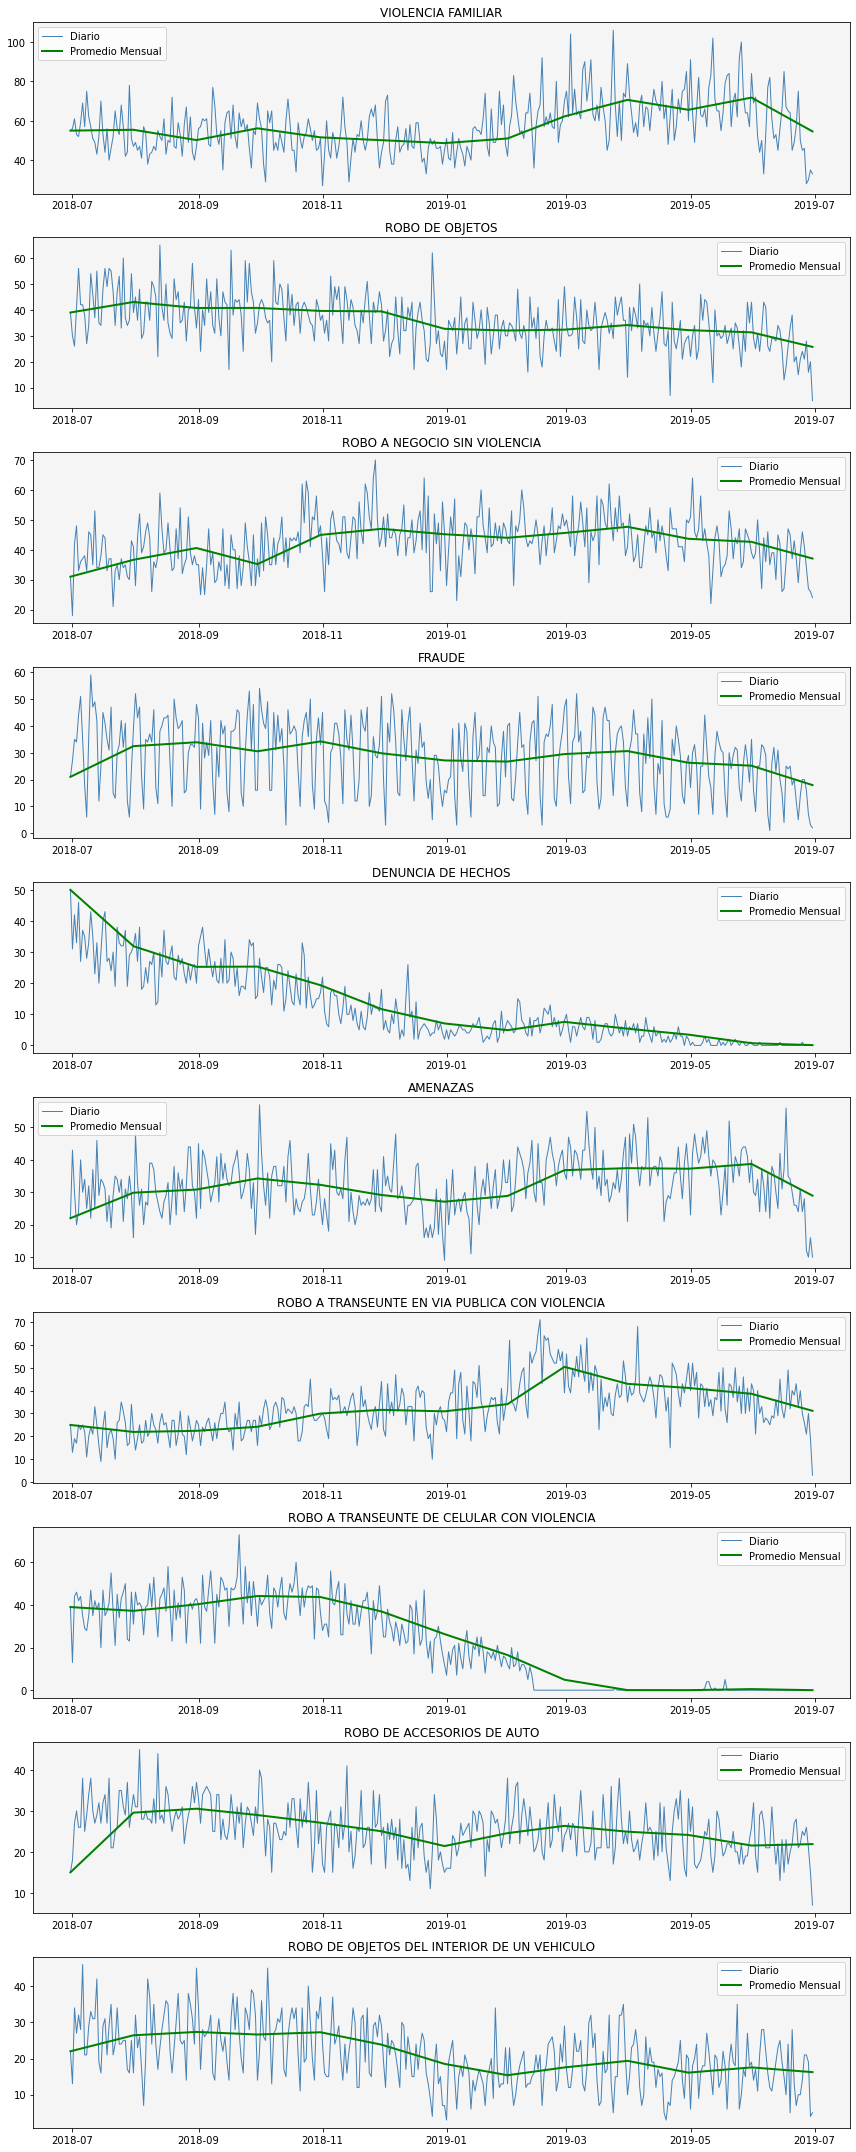

In [17]:
fig, axs = plt.subplots(10, 1, figsize=(12,30))
for i, ax in enumerate(axs.flatten()):
    ax.plot(delito_diario_alcaldia.iloc[:,i],linewidth=1,label='Diario',color='steelblue')
    ax.plot(delito_diario_alcaldia.iloc[:,i].resample('M').mean(),linewidth=2,label='Promedio Mensual',color = 'green')
    ax.set_title(delito_diario_alcaldia.columns[i])
    ax.legend()
    ax.set_facecolor('whitesmoke')
fig.tight_layout()
plt.show()
plt.close()

Calculamos las pendientes de tendencia con la libreira de Prophet

In [18]:
param_delito = []
predicciones = {}
tendence_line = {}

for col in delito_diario_alcaldia.columns[:20]:
    ph_df = delito_diario_alcaldia[[col]].reset_index().rename(columns = {'fecha_hechos': 'ds',col: 'y'})
    
    #Creamos el modelo de Prophet
    m = Prophet(daily_seasonality=False,yearly_seasonality=True)
    m.fit(ph_df)
    #ajustamos los periodods a 120 para la proyeccion
    future = m.make_future_dataframe(periods=120,freq='D',)
    prediction = m.predict(future)
    predicciones[col] = prediction
    tendence = prediction[['ds', 'trend']].rename(
        columns={'ds': 'fecha_hechos', 
                 'trend': 'tendence'}).set_index('fecha_hechos')
    
    tendence_line[col] = tendence
    pendiente = (tendence.tendence[-1] - tendence.tendence[0]) / (tendence.index[-1]-tendence.index[0]).days
    param_delito.append([col,pendiente])
    
  

In [19]:
tendencia_delitos = conteo_delitos_df.merge(
    pd.DataFrame(
        param_delito,
        columns=['delito', 'm_tendencia']
    ),left_index=True, right_index=True)[['delito_x','num_casos','m_tendencia']].set_index('delito_x')

Observemos cómo se comportan estos delitos.

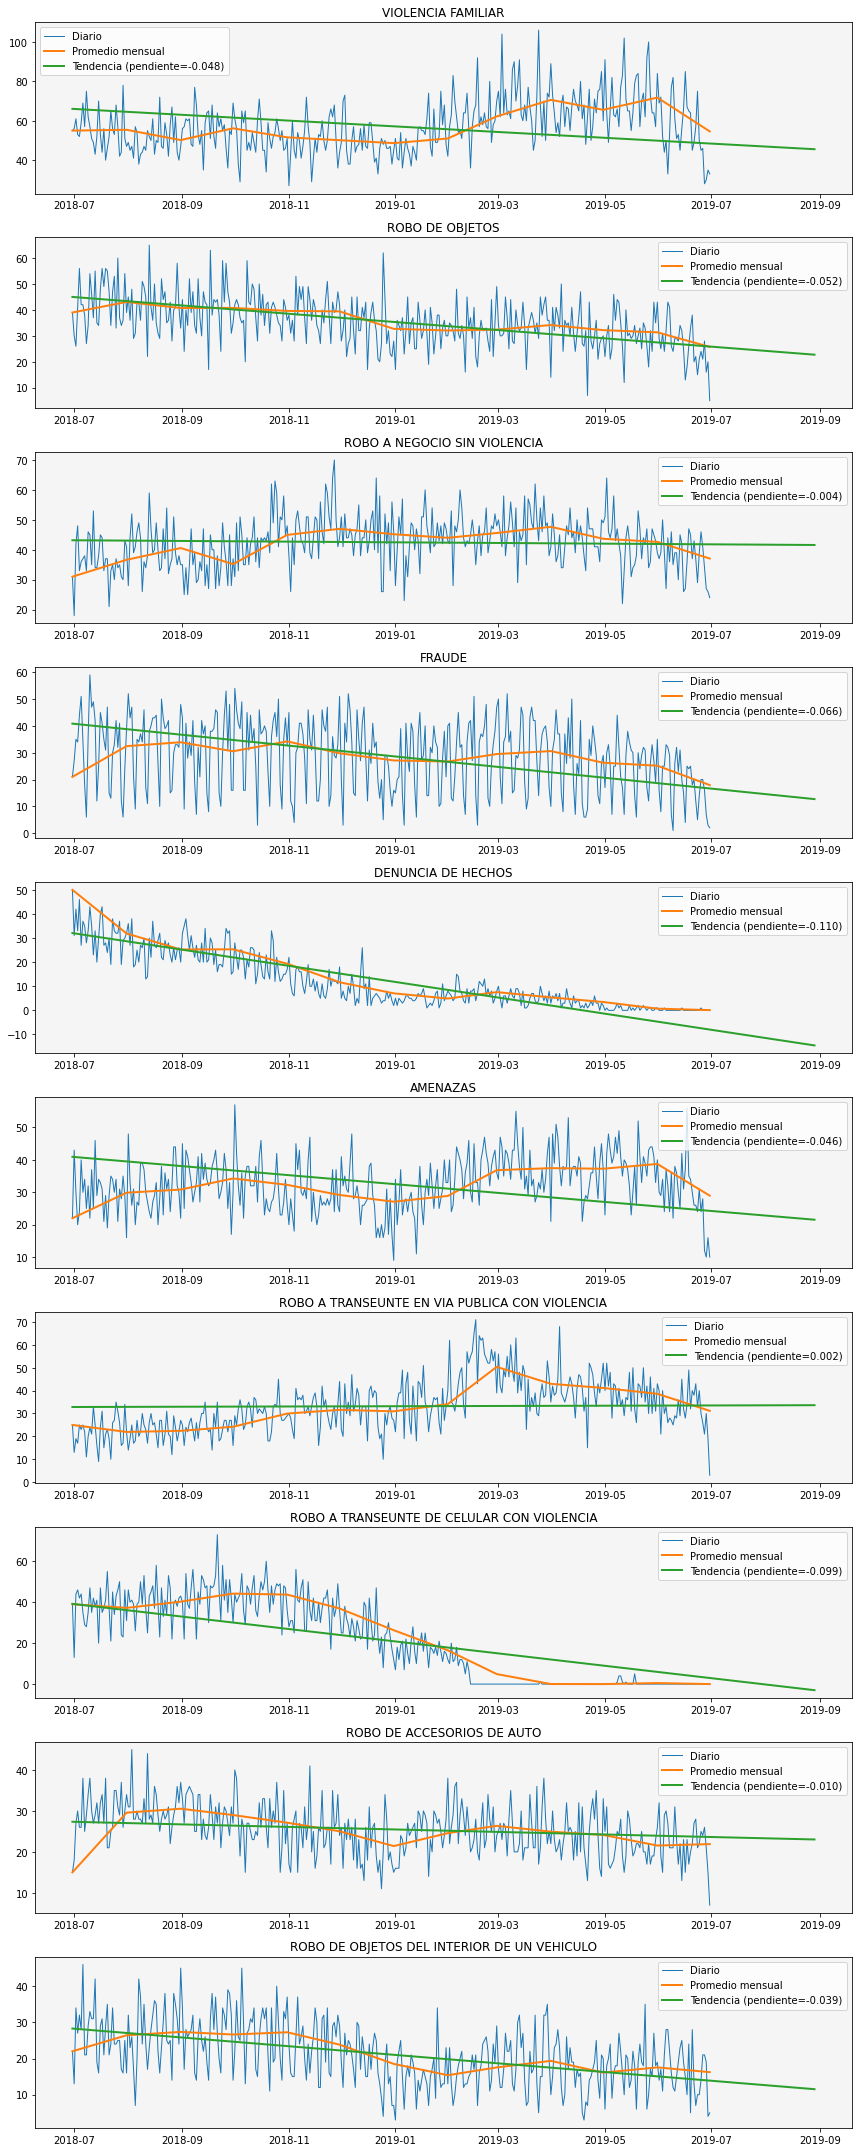

In [20]:
fig, axs = plt.subplots(10, 1, figsize=(12,30))

for i, ax in enumerate(axs.flatten()):
    
    ax.plot(delito_diario_alcaldia[tendencia_delitos.index[i]],linewidth=1,label='Diario')
    ax.plot(delito_diario_alcaldia[tendencia_delitos.index[i]].resample('M').mean(),linewidth=2,label='Promedio mensual')
    ax.plot(tendence_line[tendencia_delitos.index[i]][:-60],
            linewidth=2,label='Tendencia (pendiente={:.3f})'.format(tendencia_delitos.iloc[i, 1]))
    ax.set_title(tendencia_delitos.index[i])
    ax.legend()
    ax.set_facecolor('whitesmoke')

fig.tight_layout()
plt.show()
plt.close()

De este analisis podemos observar que si hay delitos que van a la baja pero de igual manera la denuncia de hechos tiene una pendiente en la proyeccion más pronunciada.

## 5. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

Alcaldia con más delitos:

In [21]:
delitod_por_alcaldia_df.head(1)

,alcaldia_hechos,num_casos
0,CUAUHTEMOC,131397


Alcaldia con menos delitos:

In [22]:
delitod_por_alcaldia_df.tail(1)


,alcaldia_hechos,num_casos
15,MILPA ALTA,5159


Una de las razones mas fuertes se encuentra en la densidad poblacional por delegacion junto que la actividad principal de milpalta es la agricultura:
 * La Alcaldia con mas poblacion es Cuahutemoc mientras que la menor poblacion tiene es milpalta
https://www.sedeco.cdmx.gob.mx/storage/app/media/uploaded-files/resultados-del-censo-pob-y-viv-2020-1.pdf

## 6. Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

Primero agrupamos el número de delitos por alcaldía y colonia, y las ordenamos por mayor número de delitos.

In [23]:
df_CDMX[['alcaldia_hechos','colonia_hechos','count']].groupby([
    'alcaldia_hechos','colonia_hechos']).sum().reset_index().rename(columns = {
    'count': 'num_casos',}).sort_values(by=['num_casos']).groupby([
    'alcaldia_hechos']).tail(3).sort_values(by=['alcaldia_hechos','num_casos'],ascending = [True, False])

,alcaldia_hechos,colonia_hechos,num_casos
116,ALVARO OBREGON,JARDINES DEL PEDREGAL,2335
218,ALVARO OBREGON,SAN ANGEL,2019
254,ALVARO OBREGON,ZEDEC SANTA FE,1843
274,AZCAPOTZALCO,EL ROSARIO,2820
284,AZCAPOTZALCO,INDUSTRIAL VALLEJO,1930
266,AZCAPOTZALCO,CENTRO DE AZCAPOTZALCO,1796
364,BENITO JUAREZ,DEL VALLE CENTRO,12644
380,BENITO JUAREZ,NARVARTE,9317
387,BENITO JUAREZ,PORTALES SUR,4587
493,COYOACAN,PEDREGAL DE SANTO DOMINGO,4434


## 7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

In [24]:
ph_df =  pd.DataFrame(df_CDMX[df_CDMX.fecha_hechos >= '2017-06-30'][[
    'delito', 'fecha_hechos']].set_index('fecha_hechos').resample('D').size()).reset_index().rename(
    columns={'fecha_hechos': 'ds',0: 'y'})

m = Prophet(
    interval_width=0.95,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=2,
)
m.add_seasonality(name='monthly', period=30, fourier_order=5, prior_scale=0.02)

m.fit(ph_df)

futuro = m.make_future_dataframe(periods=30,freq='M')
prediccion = m.predict(futuro)

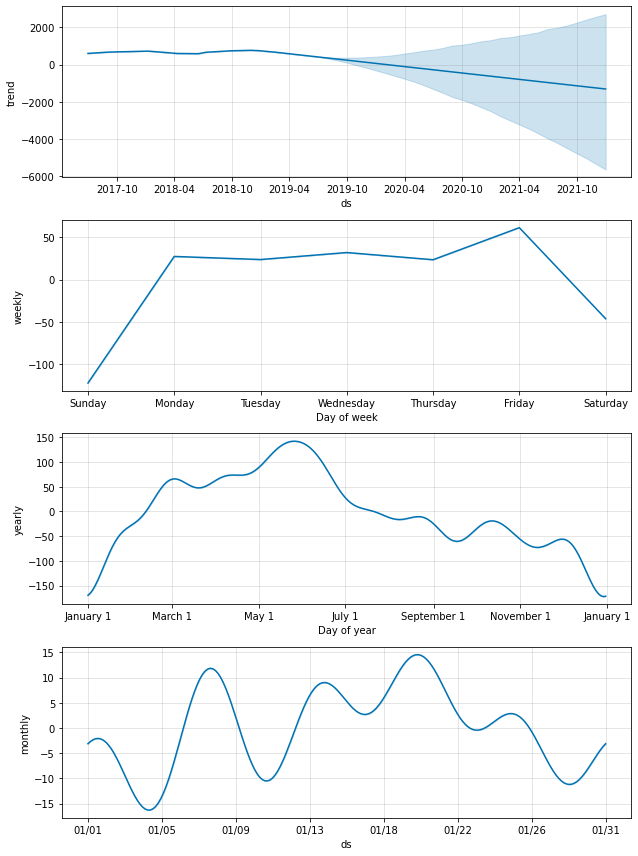

In [25]:
m.plot_components(prediccion);

Parece que hay una estacionalidad de cada 5 dias, junto que con el més de julio parece haber tambien una estacionalidad, y una baja en los delitos los fines de semana.

## 8. ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

Hacemos un mapa de calor con los primeros 25 delitos con mas incidencia

In [26]:
delitos_por_alcaldia_norm = df_CDMX[['delito', 'alcaldia_hechos']].pivot_table(
    index=['alcaldia_hechos'],
    columns=['delito'],
    values=['delito'],
    aggfunc=len
).fillna(0)[list(conteo_delitos_df.delito[:25])]
#Escalamos los datos
delitos_por_alcaldia_norm = delitos_por_alcaldia_norm.apply(lambda x: x/x.max(), axis=0)

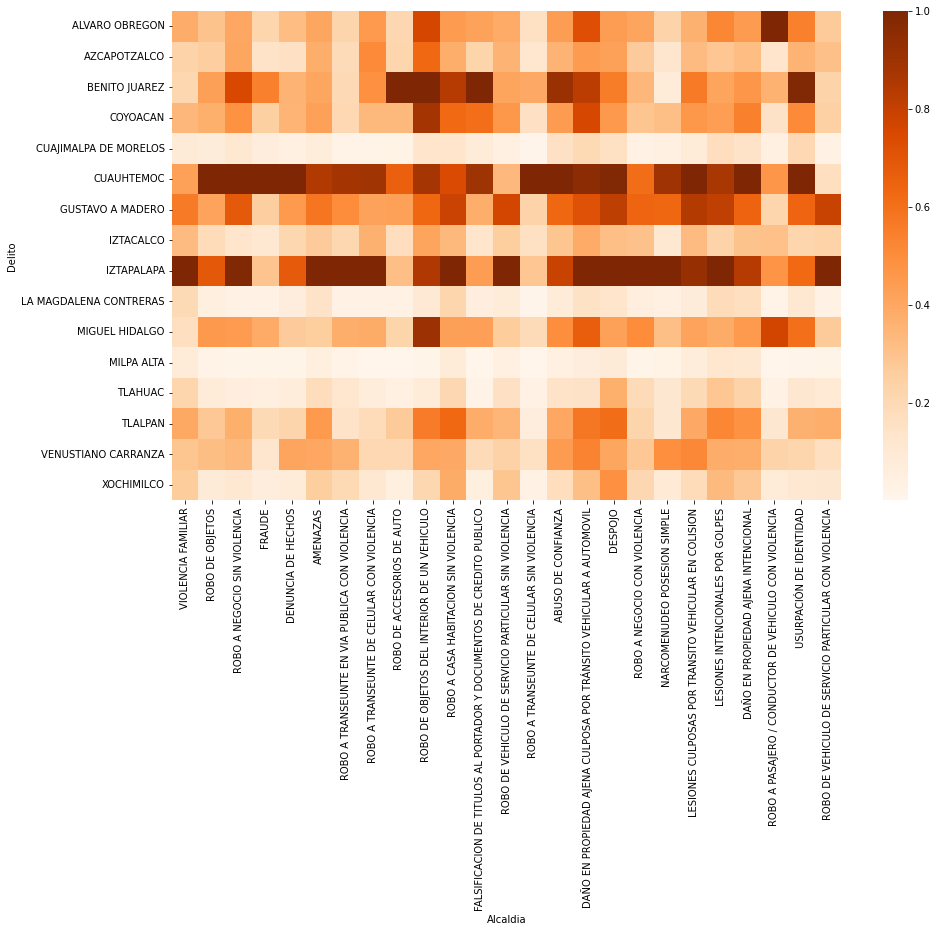

In [27]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(delitos_por_alcaldia_norm, ax=ax, cmap='Oranges')
plt.xlabel('Alcaldia')
plt.ylabel('Delito')
ax.plot()
plt.show()
plt.close()

Vemos que Cuahutemoc se caracteriza por tener la mayoria de delitos junto con Iztapalapa, mientras que el robo de identidad y el robo de accesorios de auto en la delegación Benito Juarez

## 9. Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (Hint: no importa que el dato de población no esté actualizado).

A continuación obtenemos las AGEB del INEGI y construimos un dataframte

In [11]:
import zipfile
import wget
from dbfread import DBF
if not os.path.exists('scince_cdmx.zip'):
    wget.download(
        'https://www.inegi.org.mx/contenidos/masiva/indicadores/inv/09_SCINCE_zip.zip',
        'scince_cdmx.zip'
    )
        
if not os.path.exists('scince_cdmx'):
    zipfile.ZipFile('scince_cdmx.zip').extractall('scince_cdmx')
    

In [1]:
import geopandas as gpd
ageb_gdf =gpd.read_file('scince_cdmx/09/ageb_urb.shp')[['CVEGEO', 'POB1','geometry']]

In [3]:
display(type(ageb_gdf))

geopandas.geodataframe.GeoDataFrame

In [13]:
hd_df = df_CDMX[
    df_CDMX['categoria_delito'] == 'HOMICIDIO DOLOSO'
].dropna(subset=['longitud', 'latitud'])
hd_gdf = gpd.GeoDataFrame(
    hd_df,
#     crs={'init': 'epsg:4326'},
    geometry=gpd.points_from_xy(
        hd_df['longitud'], hd_df['latitud']
    )
)

In [14]:
ageb_hd_gdf = gpd.sjoin(ageb_gdf.to_crs('epsg:4326'), hd_gdf.set_crs("EPSG:4326"), how='left')

In [15]:
ageb_hd_pivot = pd.pivot_table(ageb_hd_gdf,index='CVEGEO',columns='delito',aggfunc={'delito':len})
ageb_hd_pivot.columns = ageb_hd_pivot.columns.droplevel()
new_ageb_gdf = ageb_gdf.merge(ageb_hd_pivot, how='left',on='CVEGEO').fillna(0)

In [17]:
new_ageb_gdf['TOTAL HOMICIDIO DOLOSO'] = new_ageb_gdf[df_CDMX[df_CDMX['categoria_delito'] == 'HOMICIDIO DOLOSO']
                                                      ['delito'].unique()].sum(axis=1)

calculamos el número de homicidios dolosos por cada 100 mil habitantes 

In [21]:
new_ageb_gdf['TOTAL x 100,000 HAB'] = new_ageb_gdf[['CVEGEO', 'TOTAL HOMICIDIO DOLOSO']].apply(
    lambda x: x['TOTAL HOMICIDIO DOLOSO']/10000,
    axis=1)

,CVEGEO,POB1,geometry,FEMINICIDIO,HOMICIDIO POR AHORCAMIENTO,HOMICIDIO POR ARMA BLANCA,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO POR GOLPES,HOMICIDIOS INTENCIONALES (OTROS),TOTAL HOMICIDIO DOLOSO,"TOTAL x 100,000 HAB"
2301,0901700010210,13391,"POLYGON ((2801362.962 830171.728, 2801293.428 ...",0.0,0.0,4.0,29.0,2.0,0.0,35.0,0.0035
2031,0901500010358,9428,"POLYGON ((2800636.964 830519.820, 2800685.685 ...",0.0,0.0,1.0,21.0,1.0,6.0,29.0,0.0029
2030,0901500010343,10606,"POLYGON ((2800636.964 830519.820, 2800626.469 ...",0.0,0.0,7.0,16.0,3.0,3.0,29.0,0.0029
880,0900700012475,0,"POLYGON ((2805711.030 822465.069, 2805667.943 ...",0.0,0.0,3.0,10.0,2.0,2.0,17.0,0.0017
2050,0901500010540,7546,"POLYGON ((2799960.453 830701.143, 2799975.199 ...",0.0,0.0,4.0,10.0,2.0,1.0,17.0,0.0017
...,...,...,...,...,...,...,...,...,...,...,...
1713,0901200011994,3272,"POLYGON ((2803814.355 814118.921, 2803802.743 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
262,0900400010072,3412,"POLYGON ((2783723.314 821803.343, 2783761.348 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1042,0900700014611,820,"POLYGON ((2808542.303 822687.552, 2808587.651 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1041,0900700014594,1096,"POLYGON ((2808512.168 822843.489, 2808463.752 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


Ahora podemos generar un mapa geográfico que refleje los homicidios dolosos por AGEB.

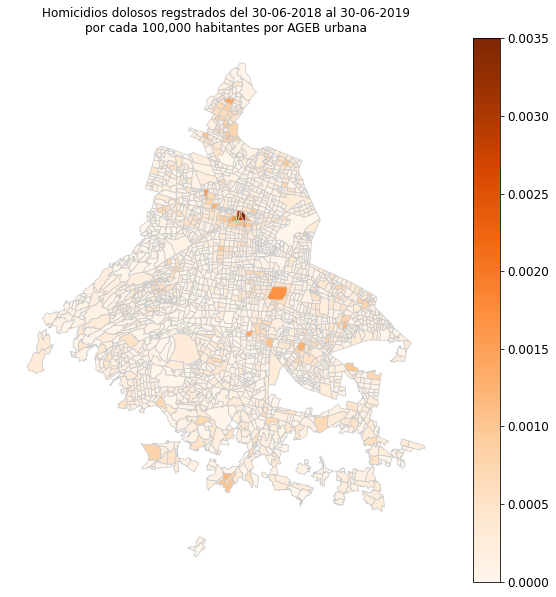

In [22]:
# new_ageb_gdf.plot(figsize=(24,12))
# plt.show()
hmin = new_ageb_gdf['TOTAL x 100,000 HAB'].max()
hmax = new_ageb_gdf['TOTAL x 100,000 HAB'].min()
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title(
    'Homicidios dolosos regstrados del 30-06-2018 al 30-06-2019\npor cada 100,000 habitantes por AGEB urbana',
    fontdict={'fontsize': '12', 'fontweight' : '2'}
)
sm = plt.cm.ScalarMappable(cmap='Oranges',norm=plt.Normalize(vmin=hmin, vmax=hmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
new_ageb_gdf.plot(
    'TOTAL HOMICIDIO DOLOSO',
    cmap='Oranges',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    figsize=(10,10)
)
plt.show()

## 10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

En este caso, vamos a usar las AGEB, pero podríamos usar otra granularidad. Primero, veamos la clasificación de delitos:

In [ ]:
display(df[['categoria_delito']].groupby(['categoria_delito']).size())

Categorizamos por delito

In [23]:
def indice_inseguridad(delitos_clasificados,
                       peso={'alta': 100, 'media': 10, 'baja': 1}):
    """
        Recibe un diccionario de 3 elementos con el número de delitos
        por categoría, e.g.:
        
        >>>{'alta': 2, 'media': 10, 'baja': 150}
        
        Devuelve un diccionario con el vector generado al multiplicar
        el número de elementos por el peso correspondiente, junto con
        su norma. Los valores por defecto son escala logarítmica.
        
        >>> indice_inseguridad({'alta': 2, 'media': 10, 'baja': 150})
        >>> {'alta': 200, 'media': 100, 'baja': 150, 'norma': 269.2582403567252}
            
    """
    vector_delitos = {}
    norma_2 = 0
    for key, value in delitos_clasificados.items():
        vector_delitos[key] = peso[key] * value
        norma_2 += vector_delitos[key] ** 2
        
    vector_delitos['norma'] = norma_2 ** (1/2)
    
    return vector_delitos  

Una vez definido el indicador, determinamos cómo vamos a clasificar los delitos. Personalmente, me gustaría separar los delitos violentos de los no violentos, pero por ahora trabajaremos con las categorías establecidas de la siguiente forma:

In [24]:
helper_dic = {
    'alta': [
        'HOMICIDIO DOLOSO',
        'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
        'SECUESTRO',
        'VIOLACIÓN'
    ],
    'media': [
        'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
        'ROBO A CASA HABITACIÓN CON VIOLENCIA ',
        'ROBO A CASA HABITACIÓN CON VIOLENCIA',
        'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
        'ROBO A NEGOCIO CON VIOLENCIA',
        'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
        'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA ',
        'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
        'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
        'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
        'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
        'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
        'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA'
    ],
    'baja': [
        'DELITO DE BAJO IMPACTO',
        'HECHO NO DELICTIVO'
    ]
}

clas_delito = {}
for key, value in helper_dic.items():
    for v in value:
        clas_delito.setdefault(v, key)

Con la nueva clasificación y el nuevo índice, podemos agregar el indicador a nuestro dataframe

In [25]:
class_df = df_CDMX.dropna(subset=['longitud', 'latitud']).copy()
class_df['clas_delito'] = class_df[['categoria_delito']].apply(lambda x:clas_delito[x[0]],axis=1)
class_gdf = gpd.GeoDataFrame(class_df,geometry=gpd.points_from_xy(class_df['longitud'], class_df['latitud']))
class_ageb_gdf = gpd.sjoin(ageb_gdf.to_crs('epsg:4326'), class_gdf.set_crs("EPSG:4326"), how='left')
class_ageb_pivot = pd.pivot_table(class_ageb_gdf,index='CVEGEO',columns='clas_delito',aggfunc={'clas_delito':len})
class_ageb_pivot.columns = class_ageb_pivot.columns.droplevel()
final_clas_ageb_gdf = ageb_gdf.merge(class_ageb_pivot, how='left',on='CVEGEO').fillna(0)

In [26]:
final_clas_ageb_gdf = ageb_gdf.merge(class_ageb_pivot, how='left',on='CVEGEO').fillna(0)

final_clas_ageb_gdf['idx_inseguridad'] = final_clas_ageb_gdf.apply(
    lambda x:
        indice_inseguridad(
            {
                'baja': x['baja'],
                'media': x['media'],
                'alta': x['alta'],
            }
        )['norma'],
    axis = 1
)

In [27]:
max_idx_inseguridad = final_clas_ageb_gdf[['idx_inseguridad']].max()
final_clas_ageb_gdf[['idx_inseguridad_norm']]= final_clas_ageb_gdf[['idx_inseguridad']].apply(lambda x: x/max_idx_inseguridad,axis = 1,)

In [28]:
final_clas_ageb_gdf[['idx_inseguridad']].max()

idx_inseguridad    7614.496963
dtype: float64

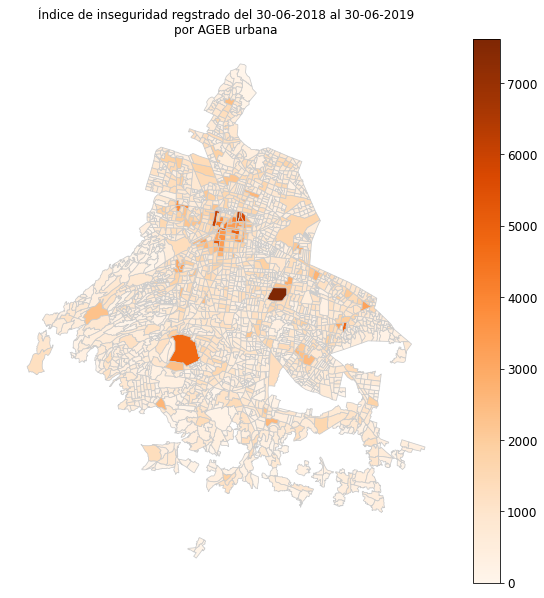

In [29]:
# new_ageb_gdf.plot(figsize=(24,12))
# plt.show()
hmin = final_clas_ageb_gdf[['idx_inseguridad']].min()
hmax = final_clas_ageb_gdf[['idx_inseguridad']].max()
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title(
    'Índice de inseguridad regstrado del 30-06-2018 al 30-06-2019\npor AGEB urbana',
    fontdict={'fontsize': '12', 'fontweight' : '2'}
)
sm = plt.cm.ScalarMappable(cmap='Oranges',norm=plt.Normalize(vmin=hmin, vmax=hmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
final_clas_ageb_gdf.plot(
    'idx_inseguridad',
    cmap='Oranges',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    figsize=(10,10)
)
plt.show()

## 11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos.

In [30]:
final_clas_ageb_gdf

,CVEGEO,POB1,geometry,alta,baja,media,idx_inseguridad,idx_inseguridad_norm
0,0900200010010,3424,"POLYGON ((2792673.309 837911.475, 2792661.677 ...",3.0,136.0,54.0,632.531422,0.083069
1,0900200010025,5912,"POLYGON ((2793350.823 837765.350, 2793352.857 ...",3.0,215.0,54.0,654.083328,0.085900
2,090020001003A,4638,"POLYGON ((2792311.179 837633.517, 2792359.899 ...",3.0,247.0,33.0,509.812711,0.066953
3,0900200010044,5007,"POLYGON ((2792448.207 837485.647, 2792448.126 ...",1.0,365.0,35.0,515.485208,0.067698
4,0900200010097,2260,"POLYGON ((2792415.239 836846.390, 2792356.808 ...",1.0,203.0,33.0,400.136227,0.052549
...,...,...,...,...,...,...,...,...
2427,0901700011488,1257,"POLYGON ((2807909.927 828694.963, 2807906.478 ...",0.0,32.0,1.0,33.526109,0.004403
2428,0901700011492,1013,"POLYGON ((2807909.927 828694.963, 2808056.201 ...",1.0,27.0,1.0,104.062481,0.013666
2429,0901700011505,2741,"POLYGON ((2807731.174 828676.619, 2807845.630 ...",0.0,7.0,0.0,7.000000,0.000919
2430,090170001151A,2352,"POLYGON ((2807574.924 828548.893, 2807544.836 ...",0.0,55.0,4.0,68.007353,0.008931


Para establecer concentración geográfica de los delitos, vamos a usar el algoritmo k-means en la categoria de delito

In [32]:
dbscan_ready_df = df_CDMX[
    ['longitud', 'latitud', 'categoria_delito']
].dropna(
    subset=['longitud', 'latitud']
).pivot_table(
    index=['longitud', 'latitud'],
    columns=['categoria_delito'],
    values=['categoria_delito'],
    aggfunc=len
).fillna(0).reset_index()

display(dbscan_ready_df)

categoria_delito,longitud,latitud,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,-99.342765,19.309007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-99.341311,19.308229,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-99.341172,19.303706,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-99.341141,19.308421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-99.341097,19.303647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614938,-98.948126,19.224828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614939,-98.947609,19.225288,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614940,-98.947138,19.225228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614941,-98.946991,19.225158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para nuestro cálculo son demasiadas entradas, por lo que lo vamos a agrupar por AGEP y posteriormente hacer el clustering.

In [33]:
cat_df = df_CDMX[['longitud', 'latitud', 'categoria_delito']].dropna(subset=['longitud', 'latitud']).copy()

cat_df.rename(columns={'longitud': 'xm', 'latitud': 'ym'},inplace=True)

cat_gdf = gpd.GeoDataFrame(cat_df,geometry=gpd.points_from_xy(cat_df['xm'], cat_df['ym']))

cat_ageb_gdf = gpd.sjoin(ageb_gdf.to_crs('epsg:4326'), cat_gdf.set_crs("EPSG:4326"), how='left')

cat_ageb_pivot = pd.pivot_table(
    cat_ageb_gdf,
    index='CVEGEO',
    columns='categoria_delito',
    aggfunc={'categoria_delito':len}
)
cat_ageb_pivot.columns = cat_ageb_pivot.columns.droplevel()

final_cat_ageb_gdf = ageb_gdf.merge(cat_ageb_pivot, how='left',on='CVEGEO').fillna(0)

In [34]:
final_cat_ageb_gdf = ageb_gdf.merge(cat_ageb_pivot, how='left',on='CVEGEO').fillna(0)

final_cat_ageb_gdf['centroids'] = final_cat_ageb_gdf[['geometry']].centroid
final_cat_ageb_gdf['x'] = final_cat_ageb_gdf['centroids'].x
final_cat_ageb_gdf['y'] = final_cat_ageb_gdf['centroids'].y

In [44]:
kkmeans_ready_df = final_cat_ageb_gdf[['x', 'y'] + list(df['categoria_delito'].unique())].copy()
kkmeans_ready_df_tmp = kkmeans_ready_df.copy()

In [39]:
dbscan_ready_df_tmp.shape

(2432, 18)

In [37]:
from sklearn.cluster import KMeans

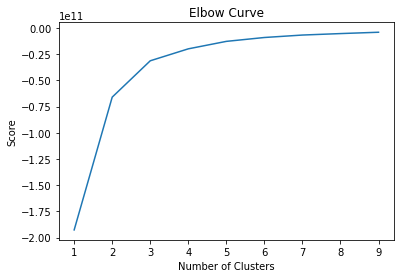

In [45]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = kkmeans_ready_df_tmp[['y']]
X_axis = kkmeans_ready_df_tmp[['x']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(kkmeans_ready_df_tmp[kkmeans_ready_df_tmp.columns[1:18]]) 
kkmeans_ready_df_tmp['cluster'] = kmeans.fit_predict(kkmeans_ready_df_tmp[kkmeans_ready_df_tmp.columns[1:18]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(kkmeans_ready_df_tmp[kkmeans_ready_df_tmp.columns[1:18]]) # Labels of each point
kkmeans_ready_df_tmp.head(10)

,x,y,DELITO DE BAJO IMPACTO,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,HOMICIDIO DOLOSO,HECHO NO DELICTIVO,ROBO A NEGOCIO CON VIOLENCIA,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A CASA HABITACIÓN CON VIOLENCIA,VIOLACIÓN,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,SECUESTRO,cluster_label,cluster
0,2.792373e+06,837780.426588,132.0,23.0,17.0,3.0,2.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,1,3
1,2.792934e+06,837734.776003,208.0,23.0,24.0,7.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
2,2.792176e+06,837446.000828,239.0,13.0,15.0,3.0,2.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,3
3,2.792693e+06,837425.784208,350.0,10.0,22.0,1.0,1.0,15.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
4,2.792280e+06,837098.861384,199.0,16.0,11.0,2.0,0.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,3
5,2.792741e+06,837056.928662,181.0,19.0,19.0,2.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
6,2.794372e+06,836386.432590,540.0,46.0,50.0,20.0,4.0,22.0,4.0,8.0,0.0,5.0,0.0,0.0,3.0,2.0,3.0,0.0,1,3
7,2.795296e+06,836238.880749,430.0,39.0,19.0,1.0,1.0,28.0,7.0,4.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1,3
8,2.795049e+06,835874.935868,207.0,26.0,9.0,6.0,2.0,11.0,7.0,3.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1,3
9,2.791984e+06,836116.245786,151.0,55.0,13.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,3


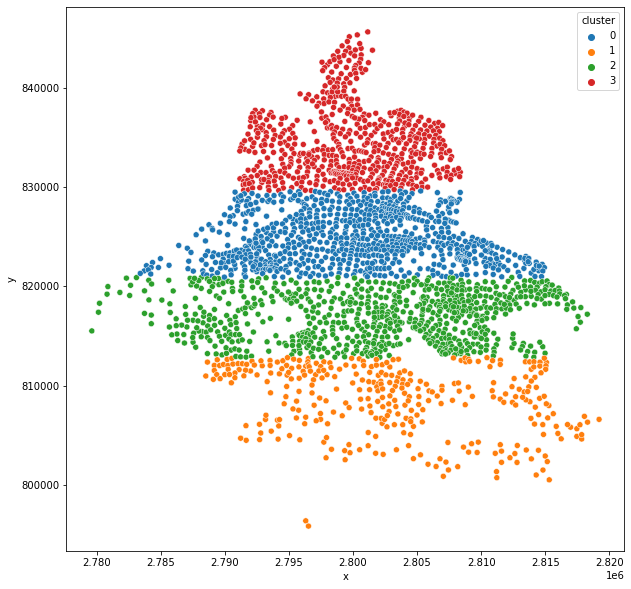

In [50]:
fig, ax = plt.subplots(1, figsize=(10, 10))

sns.scatterplot(
    data=kkmeans_ready_df_tmp[
        kkmeans_ready_df_tmp['cluster'] == -1
    ],
    x='x', y='y', ax=ax,
    color = 'silver'
)
sns.scatterplot(
    data=kkmeans_ready_df_tmp[
        kkmeans_ready_df_tmp['cluster'] > -1
    ],
    x='x', y='y', ax=ax,
    hue='cluster',
    palette="tab10"
)
plt.show()
plt.close()

Vemos que se realizó el clustering principalmente por latitud y longitud tendremos que revisar las metricas posteriores

## 12. Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las rutas de transporte público donde más ocurren estos delitos?

Construimos un df que agrupe las categorías y las cuente por calle, y posteriormente calculamos el total y lo ordenamos de mayor a menor.

In [51]:
robo_a_pasajero_df = df_CDMX[
    df_CDMX['delito'].isin(
        [
            'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA',
            'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA'
        ]
    )
][['calle_hechos', 'delito']]

In [52]:
robo_a_pasajero_pivot = robo_a_pasajero_df.pivot_table(
    index=['calle_hechos'],
    columns=['delito'],
    values=['delito'],
    aggfunc=len
).fillna(0).reset_index()

In [53]:
robo_a_pasajero_pivot['Total'] = robo_a_pasajero_pivot.apply(
    lambda x:
        x[1] + x[2],
    axis = 1
)

In [54]:
robo_a_pasajero_pivot.sort_values(by='Total', ascending=False).head(10)

delito,calle_hechos,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA,Total
1055,CALZADA IGNACIO ZARAGOZA,137.0,15.0,152.0
1999,PERIFERICO,43.0,10.0,53.0
83,ANILLO PERIFERICO,35.0,14.0,49.0
997,CALZ. IGNACIO ZARAGOZA,35.0,4.0,39.0
2020,PERIFERICO SUR,17.0,13.0,30.0
779,AVENIDA TLAHUAC,27.0,2.0,29.0
798,AVENIDA UNIVERSIDAD,26.0,2.0,28.0
1502,ERMITA IZTAPALAPA,24.0,3.0,27.0
541,AVENIDA CENTENARIO,23.0,4.0,27.0
1044,CALZADA ERMITA IZTAPALAPA,23.0,3.0,26.0
